In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Display the first 5 rows to confirm it's loaded correctly
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
df.columns = df.columns.str.replace(' ', '_')
df.rename(columns={'Quality_of_Sleep': 'Quality_of_Sleep'}, inplace=True) # Example of specific rename if needed

In [9]:
# Split the 'Blood_Pressure' column into two new columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True)

# Convert the new columns to a numeric type (integer)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

# Drop the original 'Blood_Pressure' column as it's no longer needed
df.drop('Blood_Pressure', axis=1, inplace=True)

# Verify the changes
print("Data after cleaning:")
df.head()

Data after cleaning:


,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots
sns.set_style('whitegrid')

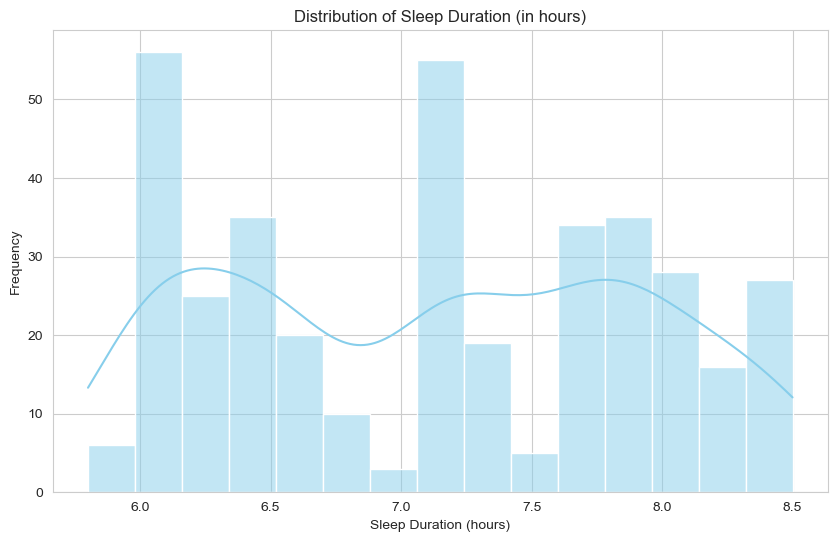

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep_Duration'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Sleep Duration (in hours)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

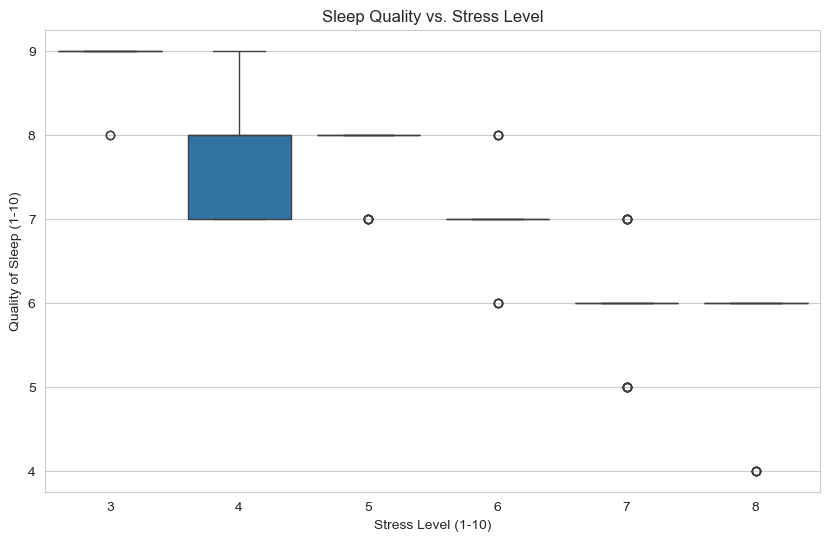

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Quality_of_Sleep', data=df)
plt.title('Sleep Quality vs. Stress Level')
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Quality of Sleep (1-10)')
plt.show()

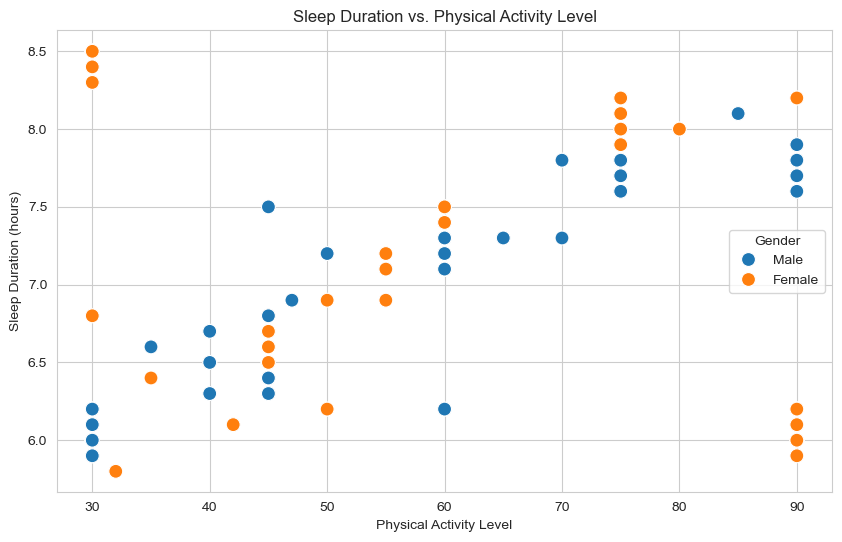

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical_Activity_Level', y='Sleep_Duration', data=df, hue='Gender', s=100)
plt.title('Sleep Duration vs. Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Gender')
plt.show()

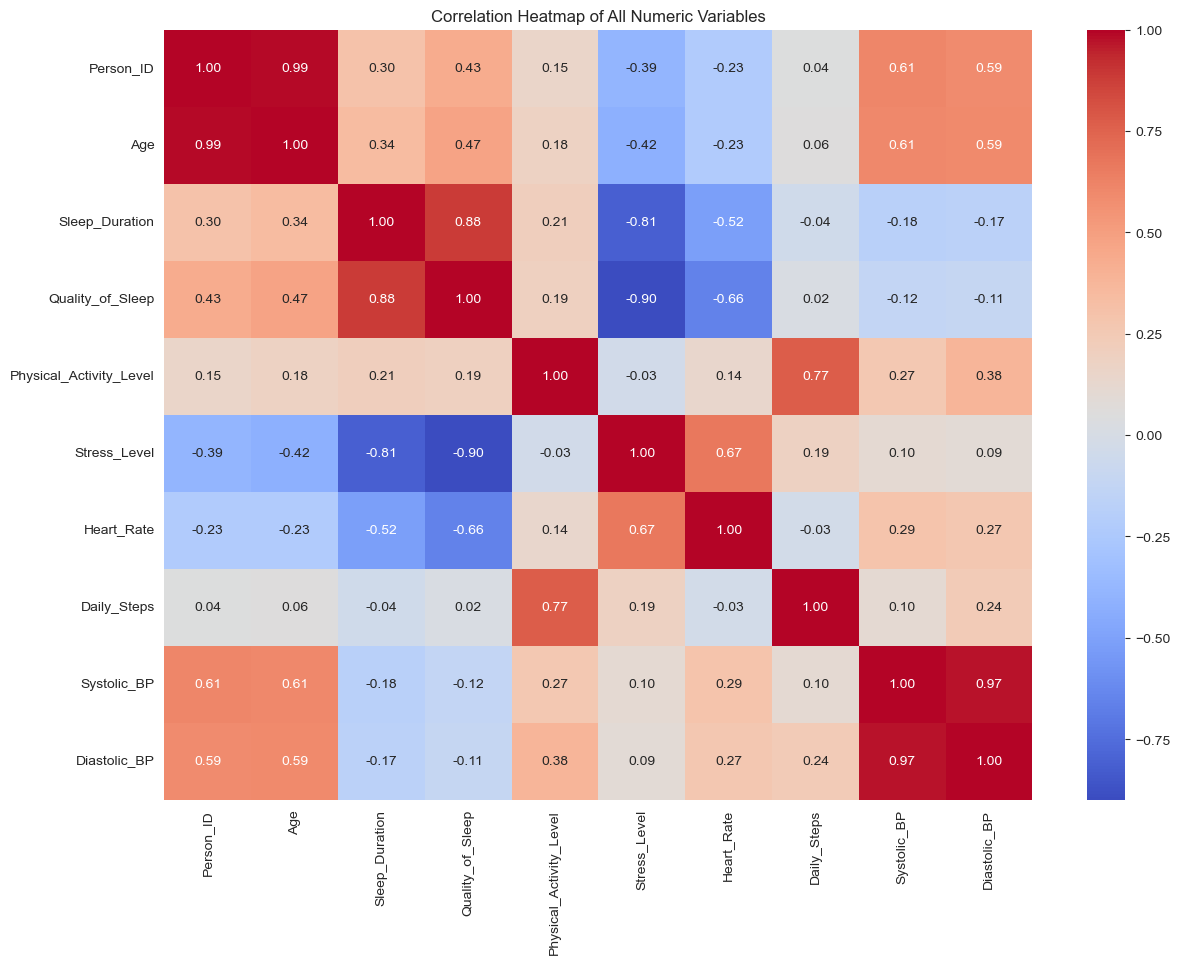

In [19]:
# Select only the numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Numeric Variables')
plt.show()

In [21]:
# Save the final, cleaned DataFrame to a file
df.to_csv('cleaned_sleep_data.csv', index=False)

print("Cleaned data has been saved to 'cleaned_sleep_data.csv'")

Cleaned data has been saved to 'cleaned_sleep_data.csv'
